<a href="https://colab.research.google.com/github/choiitea/Choi_DSPN_S24/blob/main/Exercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [1]:
# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/hcp_data")

# If you are running this on Colab, then use something like this.
system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

# INSERT CODE HERE
library(tidyverse)
#INSTALL GGALLY AND LOAD IT TO USE ggpairs()
install.packages("GGally")
library(GGally)

d <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

d1 <- d %>%
  select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  drop_na()

head(d1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


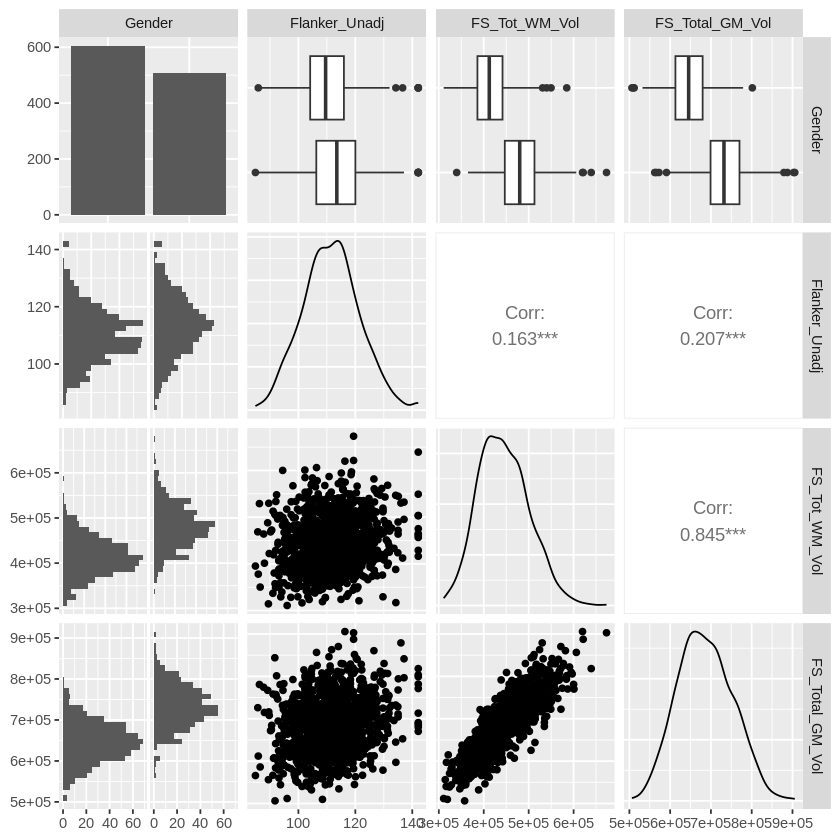

In [ ]:
#INSERT CODE HERE

#VISUALIZING ALL PAIRWISE SCATTERPLOTS
#FIRST NOTICE GENDER ISN'T CATEGORICAL - MAKE IT A FACTOR
d1$Gender <- as.factor(d1$Gender)
#ggpairs(d1)
#SUBJECT IS NOT NEEDED IN THE PAIRWISE SCATTERPLOTS
ggpairs(d1[, -which(names(d1) == "Subject")])

> *Write your response here.*\

1.   Gender does not seem to have effect on Flanker Task performance. There may be effect of gender on Total White Matter Volume and Total Grey Matter Volume.
2.    Total White Matter Volume (FS_Tot_WM_Vol) seem positively correlated with Total Grey Matter Volume(FS_Total_GM_Vol).
3. Both Total White Matter Volume and Total Grey Matter Volume are reported has having a small positive correlation with Flanker Task performance.



---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [ ]:
#INSERT CODE HERE
summary(lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1))
lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)$coef
confint(lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1))



Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *Write your response here.*\
>$\beta_0 = 90.26$, 95% CI [84.29, 96.22] and $\beta_1 = 3.11e^{-5}$, 95% CI [$2.24e^{-5}$, $3.98e^{-5}$]. According to the linear regression, grey matter volume is significantly associated with Flanker Task performance, p < 0.05, but it should be noted that grey matter volume explains very low amount of Flanker Task performance variance.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regression line. Qualitatively describe what you see.

`geom_smooth()` using formula = 'y ~ x'


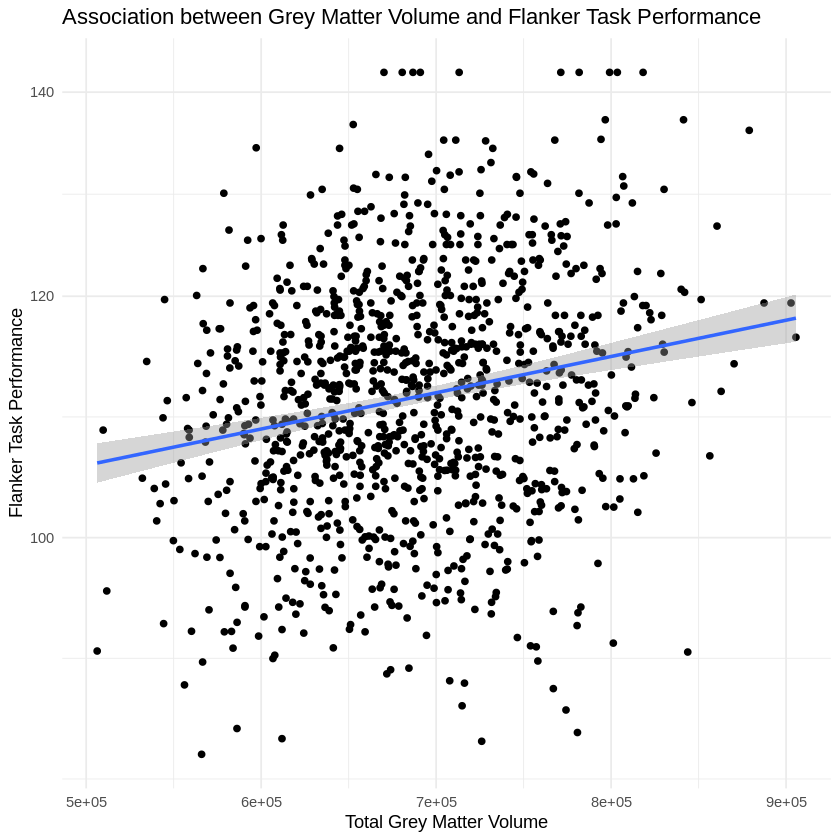

In [4]:
#INSERT CODE HERE
ggplot(d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +
  labs(x = "Total Grey Matter Volume", y = "Flanker Task Performance",
       title = "Association between Grey Matter Volume and Flanker Task Performance") +
  theme_minimal()





```
# This is formatted as code
```

> *Write your response here.*\
> There is a wide spread of Flanker Task performance against total grey matter volume. Majority of points fall outside the regression line, suggesting that the current regression model is insensitive to most of the variance within the data. The visual intuition, qualitatively, is that Flanker Task performance is not best explained by total grey matter volume.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *Write your response here.*\
>Given the low explanatory contribution of total grey matter volume, further analyses of other explanatory variables is required to understand contributing factors to Flanker Task performance.

**DUE:** 5pm EST, February 26, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*